In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from tpot import TPOTClassifier

In [2]:
src_file = Path.cwd() / "in" / "master_Discharge_Admission_only.xlsx"

In [3]:
df = pd.read_excel(src_file, sheet_name="Sheet1")

In [4]:
df.head()

,Form Date,Program_admission,Staff_admission,Client Number,Age_admission,Age of first use (Primary),Age of first use (Secondary),Age of first use (Tertiary),Are any children living with someone else due to CPS court order or other action,CHSR Dimension 1,...,Client.Number_y,Date.of.Birth_y,Last.Discharge.Date,Age.at.Discharge,Sex_y,Race,Race1,Race2,Race3,Race4
0,2014-11-20,Treatment - IDD Men,"Schroer, Dan",111156570,NaN,14,0,0,Not applicable - No children/no child protect ...,No problem,...,111156570,1994-01-15,2015-01-24,21.0,Male,White,White,NaN,NaN,NaN
1,2014-12-09,Treatment - IDD Men,"Lipsco, Sheila",111156740,NaN,16,7,0,Not applicable - No children/no child protect ...,No problem,...,111156740,1972-05-21,2015-02-05,42.0,Male,White,White,NaN,NaN,NaN
2,2014-11-14,Treatment - IDD Women,"Salsness, Carrie",111156559,NaN,17,12,12,Not applicable - No children/no child protect ...,No problem,...,111156559,1993-02-15,2015-02-20,22.0,Female,White,White,NaN,NaN,NaN
3,2014-11-26,Treatment - IDD Women,"Stewart, Lorene",111156604,NaN,17,13,16,Not applicable - No children/no child protect ...,No problem,...,111156604,1988-05-27,2015-01-27,26.0,Female,White,White,NaN,NaN,NaN
4,2014-12-03,Treatment - IDD Women,"Stewart, Lorene",1155233,NaN,17,14,14,Unknown,No problem,...,1155233,1985-01-18,2015-02-06,30.0,Female,White,White,NaN,NaN,NaN


In [5]:
df.describe()

,Age_admission,How many children,Number of arrests in lifetime,Number of days used in past 30 (Primary),Number of days used in past 30 (Secondary),"Number of days, in past 30 days, has client used alcohol (99 unknown)","Number of days, in past 30 days, has client used illicit drugs (99 unknown)",Number of lifetime detoxification admissions,Number of lifetime treatment episodes in CD treatment program (no detox),Number.of.children,Age_discharge,Ratio.living.elsewhere,Age.at.Discharge
count,0.0,1118.000000,1202.000000,1165.000000,987.000000,1209.000000,1206.000000,1208.000000,1206.000000,843.000000,1054.000000,867.000000,1054.000000
mean,NaN,22.040250,32.070715,10.044635,10.852077,5.725393,8.752073,34.625000,5.953566,1.644128,40.524668,0.171147,38.959203
std,NaN,36.656908,43.333928,13.084371,15.781225,12.877184,13.976711,174.542582,13.932957,1.699951,11.054508,0.412807,10.977022
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,18.000000
25%,NaN,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.250000,0.000000,30.000000
50%,NaN,2.000000,10.000000,3.000000,3.000000,0.000000,1.000000,0.000000,3.000000,1.000000,40.000000,0.000000,38.000000
75%,NaN,5.000000,50.000000,20.000000,25.000000,4.000000,15.000000,2.000000,5.000000,3.000000,49.750000,0.000000,48.000000
max,NaN,99.000000,500.000000,99.000000,258.000000,99.000000,99.000000,999.000000,99.000000,10.000000,74.000000,3.333333,71.000000


In [6]:
df.shape

(1210, 110)

In [7]:
df['Completed'] = 0
df['Completed'] = np.where(df['Reason.for.Discharge'].str.contains('Completed program'), 1,  0)

In [8]:
df['Completed'].value_counts()

0    807
1    403
Name: Completed, dtype: int64

In [9]:
df["How many children"].value_counts()

88.0    257
1.0     246
2.0     193
0.0     182
3.0     124
4.0      65
5.0      30
6.0       8
99.0      5
7.0       5
12.0      2
9.0       1
Name: How many children, dtype: int64

In [10]:
df["How many of the children are living with someone else for these reasons"].value_counts()

No children/no child protection involvement    1014
One                                              68
Two                                              52
Three                                            35
Four                                             21
Unknown                                           9
Ten or more                                       4
Five                                              3
Six                                               2
Seven                                             2
Name: How many of the children are living with someone else for these reasons, dtype: int64

In [11]:
df["Number of arrests in lifetime"].value_counts()

99.0     232
5.0       92
10.0      89
20.0      80
3.0       75
1.0       71
2.0       69
0.0       65
4.0       61
15.0      45
6.0       45
50.0      35
7.0       34
30.0      32
12.0      28
8.0       23
25.0      20
100.0     17
40.0       9
60.0       9
9.0        8
35.0       7
75.0       5
18.0       5
57.0       4
13.0       3
11.0       3
150.0      3
19.0       2
80.0       2
27.0       2
65.0       2
45.0       2
500.0      2
16.0       2
190.0      1
71.0       1
68.0       1
43.0       1
98.0       1
23.0       1
90.0       1
37.0       1
14.0       1
42.0       1
21.0       1
200.0      1
47.0       1
70.0       1
58.0       1
95.0       1
24.0       1
46.0       1
167.0      1
Name: Number of arrests in lifetime, dtype: int64

In [12]:
df["Number of arrests in past 30 days"].value_counts()

0     1039
1      119
99      39
2       10
no       1
3        1
Name: Number of arrests in past 30 days, dtype: int64

In [13]:
df_nums = df._get_numeric_data().copy()

In [14]:
df_nums.head()

,Age_admission,How many children,Number of arrests in lifetime,Number of days used in past 30 (Primary),Number of days used in past 30 (Secondary),"Number of days, in past 30 days, has client used alcohol (99 unknown)","Number of days, in past 30 days, has client used illicit drugs (99 unknown)",Number of lifetime detoxification admissions,Number of lifetime treatment episodes in CD treatment program (no detox),Number.of.children,Age_discharge,Ratio.living.elsewhere,Age.at.Discharge,Completed
0,NaN,88.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,24.0,0.0,21.0,1
1,NaN,3.0,50.0,1.0,10.0,1.0,1.0,3.0,4.0,3.0,45.0,0.0,42.0,0
2,NaN,88.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,24.0,0.0,22.0,1
3,NaN,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,29.0,0.0,26.0,0
4,NaN,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,33.0,0.0,30.0,1


In [15]:
df_nums.replace(to_replace=[88, 99], value=[np.NaN, np.NaN], inplace=True)

In [16]:
df_nums.drop(columns=['Age_admission'], inplace=True)

In [17]:
df_nums.head()

,How many children,Number of arrests in lifetime,Number of days used in past 30 (Primary),Number of days used in past 30 (Secondary),"Number of days, in past 30 days, has client used alcohol (99 unknown)","Number of days, in past 30 days, has client used illicit drugs (99 unknown)",Number of lifetime detoxification admissions,Number of lifetime treatment episodes in CD treatment program (no detox),Number.of.children,Age_discharge,Ratio.living.elsewhere,Age.at.Discharge,Completed
0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,24.0,0.0,21.0,1
1,3.0,50.0,1.0,10.0,1.0,1.0,3.0,4.0,3.0,45.0,0.0,42.0,0
2,NaN,10.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,24.0,0.0,22.0,1
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,29.0,0.0,26.0,0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,33.0,0.0,30.0,1


In [18]:
df_nums.fillna(0, inplace=True)

In [39]:
feature_cols = ['How many children',
 'Number of arrests in lifetime',
 'Number of days used in past 30 (Primary)',
 'Number of days used in past 30 (Secondary)',
 'Number of days, in past 30 days, has client used alcohol (99 unknown)',
 'Number of days, in past 30 days, has client used illicit drugs (99 unknown)',
 'Number of lifetime detoxification admissions',
 'Number of lifetime treatment episodes in CD treatment program (no detox)',
 'Number.of.children',
 'Ratio.living.elsewhere',
 'Age.at.Discharge']

target_cols = 'Completed'

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_nums[feature_cols],
                                                    df_nums[target_cols], test_size=0.25, random_state=0)

In [41]:
logisticRegr = LogisticRegression()

In [42]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.693069306930693


In [44]:
predictions = logisticRegr.predict(x_test)

In [45]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[203   8]
 [ 85   7]]


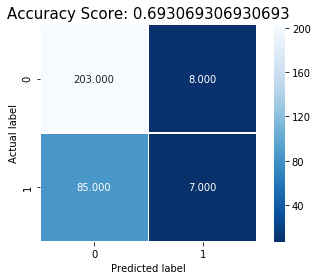

In [46]:
#plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [35]:
tpot = TPOTClassifier(generations=15, population_size=50, verbosity=2)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))
tpot.export('tpot_avivo.py')

Optimization Progress:  12%|█▎        | 100/800 [00:44<06:42,  1.74pipeline/s]

Generation 1 - Current best internal CV score: 0.6702532983123509


Optimization Progress:  19%|█▉        | 150/800 [01:40<29:26,  2.72s/pipeline]

Generation 2 - Current best internal CV score: 0.6702895269148326


Optimization Progress:  25%|██▌       | 200/800 [02:45<04:47,  2.08pipeline/s]

Generation 3 - Current best internal CV score: 0.6747335688192494


Optimization Progress:  31%|███▏      | 250/800 [03:28<08:10,  1.12pipeline/s]

Generation 4 - Current best internal CV score: 0.6768952087673219


Optimization Progress:  38%|███▊      | 300/800 [04:18<08:00,  1.04pipeline/s]

Generation 5 - Current best internal CV score: 0.683500890619811


Optimization Progress:  44%|████▍     | 350/800 [05:04<06:07,  1.22pipeline/s]

Generation 6 - Current best internal CV score: 0.6879207801225735


Optimization Progress:  50%|█████     | 400/800 [06:01<16:08,  2.42s/pipeline]

Generation 7 - Current best internal CV score: 0.6879207801225735


Optimization Progress:  56%|█████▋    | 450/800 [07:01<03:26,  1.70pipeline/s]

Generation 8 - Current best internal CV score: 0.6879207801225735


Optimization Progress:  62%|██████▎   | 500/800 [07:47<03:49,  1.31pipeline/s]

Generation 9 - Current best internal CV score: 0.687944932524228


Optimization Progress:  69%|██████▉   | 550/800 [08:33<05:07,  1.23s/pipeline]

Generation 10 - Current best internal CV score: 0.687944932524228


Optimization Progress:  75%|███████▌  | 600/800 [09:32<04:52,  1.46s/pipeline]

Generation 11 - Current best internal CV score: 0.687944932524228


Optimization Progress:  81%|████████▏ | 650/800 [10:41<02:46,  1.11s/pipeline]

Generation 12 - Current best internal CV score: 0.6912115448479909


Optimization Progress:  88%|████████▊ | 700/800 [11:36<01:50,  1.11s/pipeline]

Generation 13 - Current best internal CV score: 0.6912115448479909


Optimization Progress:  94%|█████████▍| 750/800 [12:44<01:19,  1.59s/pipeline]

Generation 14 - Current best internal CV score: 0.6912719258521269


Generation 15 - Current best internal CV score: 0.6945506143767172

Best pipeline: RandomForestClassifier(ExtraTreesClassifier(Binarizer(LinearSVC(RobustScaler(BernoulliNB(RandomForestClassifier(Binarizer(input_matrix, threshold=0.75), bootstrap=False, criterion=entropy, max_features=0.25, min_samples_leaf=8, min_samples_split=4, n_estimators=100), alpha=0.1, fit_prior=False)), C=1.0, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05), threshold=0.15000000000000002), bootstrap=False, criterion=entropy, max_features=0.45, min_samples_leaf=13, min_samples_split=8, n_estimators=100), bootstrap=True, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=8, min_samples_split=15, n_estimators=100)
0.7095709570957096


True

In [36]:
tpot_predictions = tpot.predict(x_test)

In [37]:
cm_tpot = metrics.confusion_matrix(y_test, tpot_predictions)
print(cm_tpot)

[[171  40]
 [ 48  44]]


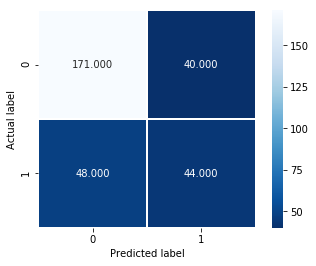

In [38]:
#plt.figure(figsize=(9,9))
sns.heatmap(cm_tpot, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);